In [44]:
import pandas as pd
import seaborn as sns

In [45]:
df=pd.read_csv('spam (1).csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [47]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


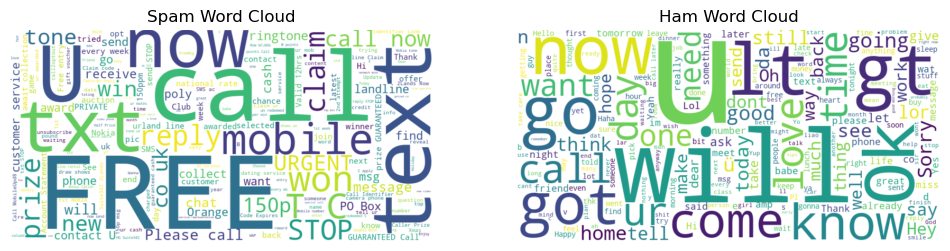

In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sample data (replace this with your actual data)
spam_messages = ' '.join(df[df['Category'] == 'spam']['Message'].tolist())
ham_messages = ' '.join(df[df['Category'] == 'ham']['Message'].tolist())

# Generate word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Generate word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')

plt.show()



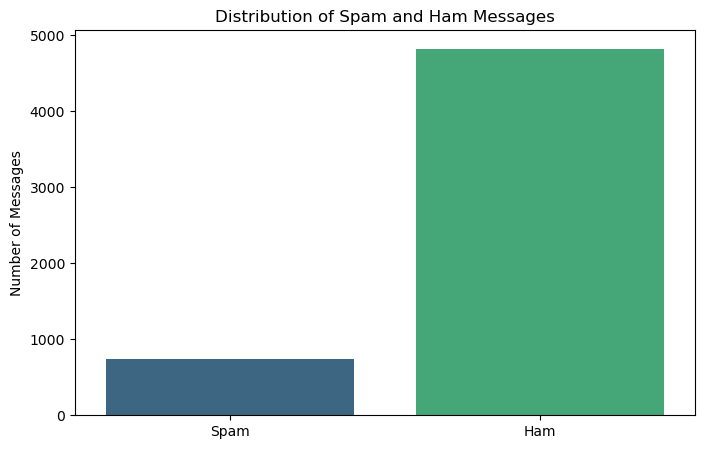

In [49]:
spam_count = df[df['Category'] == 'spam'].shape[0]
ham_count = df[df['Category'] == 'ham'].shape[0]

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=['Spam', 'Ham'], y=[spam_count, ham_count], palette='viridis')
plt.title('Distribution of Spam and Ham Messages')
plt.ylabel('Number of Messages')
plt.show()

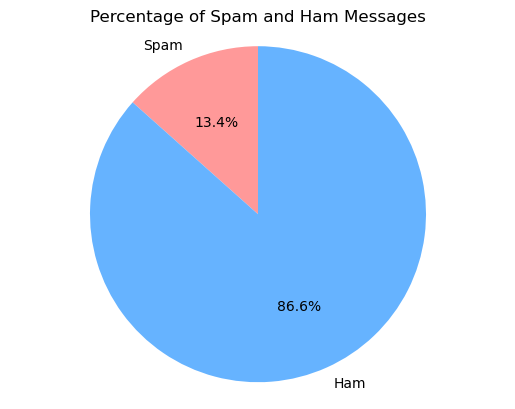

In [50]:
spam_percentage = (df['Category'] == 'spam').sum() / len(df) * 100
ham_percentage = (df['Category'] == 'ham').sum() / len(df) * 100

# Plot a pie chart
labels = ['Spam', 'Ham']
sizes = [spam_percentage, ham_percentage]
colors = ['#ff9999', '#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Spam and Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

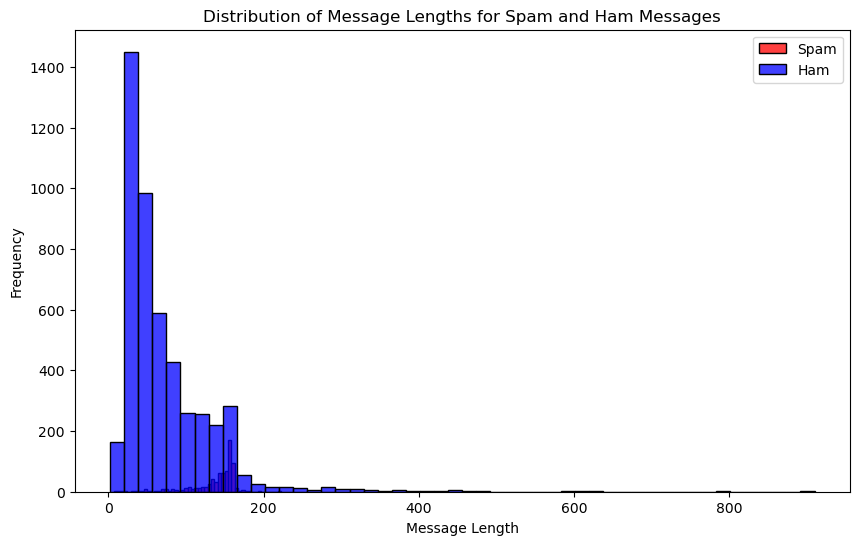

In [51]:
df['Message Length'] = df['Message'].apply(len)

# Plot histograms for spam and ham messages
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Category'] == 'spam']['Message Length'], bins=50, color='red', label='Spam', kde=False)
sns.histplot(df[df['Category'] == 'ham']['Message Length'], bins=50, color='blue', label='Ham', kde=False)

plt.title('Distribution of Message Lengths for Spam and Ham Messages')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

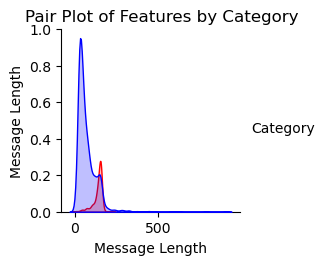

In [52]:
df['Message Length'] = df['Message'].apply(len)

# Select relevant columns for the pair plot
columns_for_pair_plot = ['Message Length']  # Add other columns as needed

# Plot the pair plot
sns.pairplot(df, hue='Category', vars=columns_for_pair_plot, palette={'ham': 'blue', 'spam': 'red'})
plt.suptitle('Pair Plot of Features by Category', y=1.02)
plt.show()

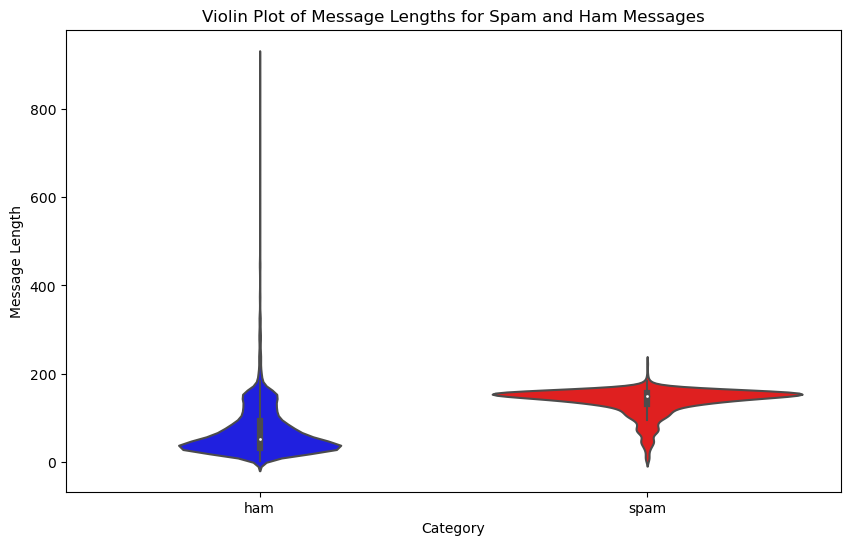

In [53]:
df['Message Length'] = df['Message'].apply(len)

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Message Length', data=df, palette={'ham': 'blue', 'spam': 'red'})
plt.title('Violin Plot of Message Lengths for Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [57]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [58]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9834888729361091

In [59]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [60]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [61]:
clf.score(X_test,y_test)

0.9834888729361091

In [62]:
clf.predict(emails)

array([0, 1], dtype=int64)